<a href="https://colab.research.google.com/github/jw13k/2024-1-my-BDA/blob/main/inclass/04w_0326_tue_ch06_dataframe_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##빅데이터
04주차

###파이썬 설치확인

In [2]:
import site

In [3]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2


##코랩에서 한글 처리

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.0 MB/s eta 0:00:00


In [4]:
#그림선명
%config inlineBackend.figure_format = 'retina'

Text(0.5, 0, '직선')

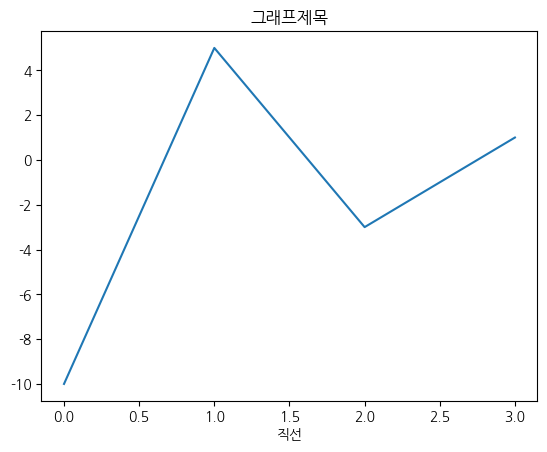

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프제목')
plt.xlabel('직선')

###데이터복사

In [6]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.60 MiB/s, done.


In [8]:
import pandas as pd
exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [12]:
exam.sample(5)

,id,nclass,math,english,science
16,17,5,65,68,98
2,3,1,45,86,78
17,18,5,80,78,90
7,8,2,90,78,25
15,16,4,58,98,65


In [33]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [35]:
exam['nclass'] == 1

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: nclass, dtype: bool

In [34]:
exam[exam['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [16]:
# 2반인 경우만 추출
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [18]:
# 수학점수가 50을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [19]:
# 영어 점수가 80점 이하인 경우
exam.query('english <= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


In [23]:
# 1반이면서 수학 점수가 50 점 이상인 경우
exam.query('(nclass == 1) & (math >= 50)')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [22]:
exam.query('math >= 70 & english > 70')

,id,nclass,math,english,science
6,7,2,80,90,45
7,8,2,90,78,25
17,18,5,80,78,90
19,20,5,78,83,58


In [24]:
# 2반이면서 영어 점수가 80 점 이상인 경우
exam.query('nclass == 2 & english >= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [25]:
# 수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [27]:
exam.query('math > 80 | science > 70')

,id,nclass,math,english,science
2,3,1,45,86,78
5,6,2,50,89,98
7,8,2,90,78,25
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


In [30]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [32]:
exam.query('math in [50, 80, 60]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
5,6,2,50,89,98
6,7,2,80,90,45
9,10,3,50,98,45
17,18,5,80,78,90


In [31]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass in [1, 3, 5]') # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [40]:
exam[exam['nclass'].isin([1, 3, 5])] # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [44]:
exam['nclass'] #시리즈

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

In [46]:
exam[['nclass']] #데이터프레임

,nclass
0,1
1,1
2,1
3,1
4,2
5,2
6,2
7,2
8,3
9,3


##추출한 행으로 데이터 만들기

In [48]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')

In [49]:
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [50]:
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [54]:
nclass1["math"].mean() #평균

46.25

In [55]:
nclass1["math"].sum() #총합

185

In [57]:
nclass1.math.sum() #총합

185

In [56]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass == 1]

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass == 2]

In [58]:
# 2반 과학 점수 평균 구하기
nclass2.science.mean()

58.25

###문자 변수를 이용해 조건에 맞는 행 추출하기

In [59]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [61]:
# 전체 조건에 작은따옴표, 추출할 문자에 큰따옴표 사용 (반대 가능)
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [62]:
df.query("sex == 'F' & country == 'Korea'")

,sex,country
0,F,Korea


###(알아두면 좋아요)  외부 변수를 이용해 추출하기

In [63]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [64]:
exam[exam.nclass == var]

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


###파이썬에서 사용하는 기호
<
<=

###메소드 df.isin()

In [65]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [67]:
df.isin([0]) #list 나 dict 형태

,num_legs,num_wings
falcon,False,False
dog,False,True


In [66]:
df.isin([0, 2])

,num_legs,num_wings
falcon,True,True
dog,False,True


##06-3 필요한 변수만 추출하기
###변수추출하기

In [68]:
exam['math']  # math 추출

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [70]:
exam[['english']]  # english 추출

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [71]:
exam.english

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [75]:
exam.sample(3)

,id,nclass,math,english,science
5,6,2,50,89,98
7,8,2,90,78,25
19,20,5,78,83,58


In [72]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [76]:
exam.columns[3]

'english'

In [79]:
exam[[exam.columns[3]]]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [81]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [82]:
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


In [84]:
exam[['nclass', 'math', 'english']]  # nclass, math, english 추출

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


### 행과 변수(열) 제거하기

In [85]:
exam.sample(3)

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
1,2,1,60,97,60


In [89]:
exam.drop(1, axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [91]:
exam.drop(labels = [1, 5], axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [93]:
exam.drop(labels='nclass', axis=1)

,id,math,english,science
0,1,50,98,50
1,2,60,97,60
2,3,45,86,78
3,4,30,98,58
4,5,25,80,65
5,6,50,89,98
6,7,80,90,45
7,8,90,78,25
8,9,20,98,15
9,10,50,98,45


In [94]:
exam.drop(['nclass', 'english'], axis=1) # 여러 열 삭제

,id,math,science
0,1,50,50
1,2,60,60
2,3,45,78
3,4,30,58
4,5,25,65
5,6,50,98
6,7,80,45
7,8,90,25
8,9,20,15
9,10,50,45


In [95]:
exam.drop(index=3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [96]:
exam.drop(columns="math")

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [97]:
exam.drop(columns=["math", "science"])

,id,nclass,english
0,1,1,98
1,2,1,97
2,3,1,86
3,4,1,98
4,5,2,80
5,6,2,89
6,7,2,90
7,8,2,78
8,9,3,98
9,10,3,98


###pandas 함수 조합하기

In [101]:
# nclass가 1인 행만 추출한 다음 english 추출
exam.query('nclass == 1')['english']

0    98
1    97
2    86
3    98
Name: english, dtype: int64

In [100]:
exam.query('nclass == 1')[['english']]

,english
0,98
1,97
2,86
3,98


In [102]:
# math가 50 이상인 행만 추출한 다음 id, math 추출
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [105]:
exam.query('math >= 50')[['id', 'math']].sample(3) #head, tail

,id,math
14,15,75
1,2,60
0,1,50


In [107]:
exam.query('math >= 50')[['id', 'math']].sample(frac=.4)

,id,math
1,2,60
9,10,50
19,20,78
10,11,65
5,6,50


In [109]:
# math가 50 이상인 행만 추출
# id, math 추출
# 앞부분 10행 추출
exam.query('math >= 50') \
    [['id', 'math']] \
    .head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [111]:
exam.query('math > 70') \
    [['nclass', 'math']] \
    .head(10)

,nclass,math
6,2,80
7,2,90
14,4,75
17,5,80
18,5,89
19,5,78


In [112]:
exam.query('math >= 50 & english >= 80') \
         [['id', 'math', 'english']] \
         .head()

,id,math,english
0,1,50,98
1,2,60,97
5,6,50,89
6,7,80,90
9,10,50,98


##06-4 순서대로 정렬하기

In [115]:
exam.sort_values('math') # math 오름차순 정렬

,id,nclass,math,english,science
8,9,3,20,98,15
4,5,2,25,80,65
3,4,1,30,98,58
2,3,1,45,86,78
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
0,1,1,50,98,50
9,10,3,50,98,45
5,6,2,50,89,98


In [117]:
  # math 내림차순 정렬
exam.sort_values('math', ascending = False)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


In [121]:
# nclass, math 오름차순 정렬
exam.sort_values(['nclass', 'math'] , ascending = False)

,id,nclass,math,english,science
18,19,5,89,68,87
17,18,5,80,78,90
19,20,5,78,83,58
16,17,5,65,68,98
14,15,4,75,56,78
15,16,4,58,98,65
13,14,4,48,87,12
12,13,4,46,98,65
10,11,3,65,65,65
9,10,3,50,98,45


In [122]:
# nclass 오름차순, math 내림차순 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


##06-5 파생변수 추가하기

In [123]:
# total 변수 추가
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [124]:
exam.sample(4)

,id,nclass,math,english,science
7,8,2,90,78,25
4,5,2,25,80,65
1,2,1,60,97,60
11,12,3,45,85,32


In [126]:
# total 변수 추가
exam['total'] = exam['math'] + exam['english'] + exam['science']
exam.sample(3) # 반영

,id,nclass,math,english,science,total
2,3,1,45,86,78,209
18,19,5,89,68,87,244
1,2,1,60,97,60,217


###여러 파생변수 한 번에 추가하기

In [127]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],       # total 추가
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)  # mean 추가

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


###`df.assign()`에 `np.where()` 적용하기

In [129]:
import pandas as pd
exam = pd.read_csv('data/exam.csv')

In [128]:
import numpy as np
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

,id,nclass,math,english,science,total,test
0,1,1,50,98,50,198,fall
1,2,1,60,97,60,217,pass
2,3,1,45,86,78,209,pass
3,4,1,30,98,58,186,fall
4,5,2,25,80,65,170,pass
5,6,2,50,89,98,237,pass
6,7,2,80,90,45,215,fall
7,8,2,90,78,25,193,fall
8,9,3,20,98,15,133,fall
9,10,3,50,98,45,193,fall


###추가한 변수를 `pandas` 함수에 바로 활용하기

In [130]:
# total 변수 추가
# total 기준 정렬
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total')

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
9,10,3,50,98,45,193
7,8,2,90,78,25,193
10,11,3,65,65,65,195
0,1,1,50,98,50,198
2,3,1,45,86,78,209


###`lambda` 이용해 데이터 프레임명 줄여 쓰기

In [131]:
# 긴 데이터 프레임명 지정
long_name = pd.read_csv('data/exam.csv')

# long_name 직접 입력
long_name.assign(new = long_name['math'] + long_name['english'] + long_name['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [133]:
(lambda x, y,: x + y)(10, 20)

30

In [134]:
fn = lambda x, y,: x + y
fn(10, 20)

30

In [132]:
# long_name 대신 x 입력
long_name.assign(new = lambda x: x['math'] + x['english'] + x['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


###앞에서 만든 변수를 활용해 다시 변수 만들기

In [135]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [136]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = lambda x: round(x['total'] / 3, 2))

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.00
1,2,1,60,97,60,217,72.33
2,3,1,45,86,78,209,69.67
3,4,1,30,98,58,186,62.00
4,5,2,25,80,65,170,56.67
5,6,2,50,89,98,237,79.00
6,7,2,80,90,45,215,71.67
7,8,2,90,78,25,193,64.33
8,9,3,20,98,15,133,44.33
9,10,3,50,98,45,193,64.33


In [137]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: x['total'] / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [138]:
data = 1.125456
round(data, 2)

1.13

In [139]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: x['total'] / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [140]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: round(x['total'] / 3, 3))

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000
1,2,1,60,97,60,217,72.333
2,3,1,45,86,78,209,69.667
3,4,1,30,98,58,186,62.000
4,5,2,25,80,65,170,56.667
5,6,2,50,89,98,237,79.000
6,7,2,80,90,45,215,71.667
7,8,2,90,78,25,193,64.333
8,9,3,20,98,15,133,44.333
9,10,3,50,98,45,193,64.333


In [141]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = exam['total'] / 3) #오류발생ㅇ

KeyError: 'total'

##학습내용 요약

In [ ]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')


## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거


## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()


## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])


## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total') \
    .head()


## 6. 집단별로 요약하기
exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']) \
   .agg(mean_cty = ('cty', 'mean'))


## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기